In [82]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 12

In [84]:
df = pd.read_csv('cleaned_data.csv')

In [85]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [86]:
df['default payment next month'].mean()

0.2217971797179718

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [90]:
np.mean(y_train)

0.223102526838873

In [91]:
np.mean(y_test)

0.21657603600225014

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [92]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, \
                                intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=None, \
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, \
                                verbose=0, warm_start=False)

In [93]:
my_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred = my_lr.predict(X_test)

In [95]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

In [96]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [97]:
y_pred_proba = my_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [98]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

Text(0, 0.5, 'Number of samples')

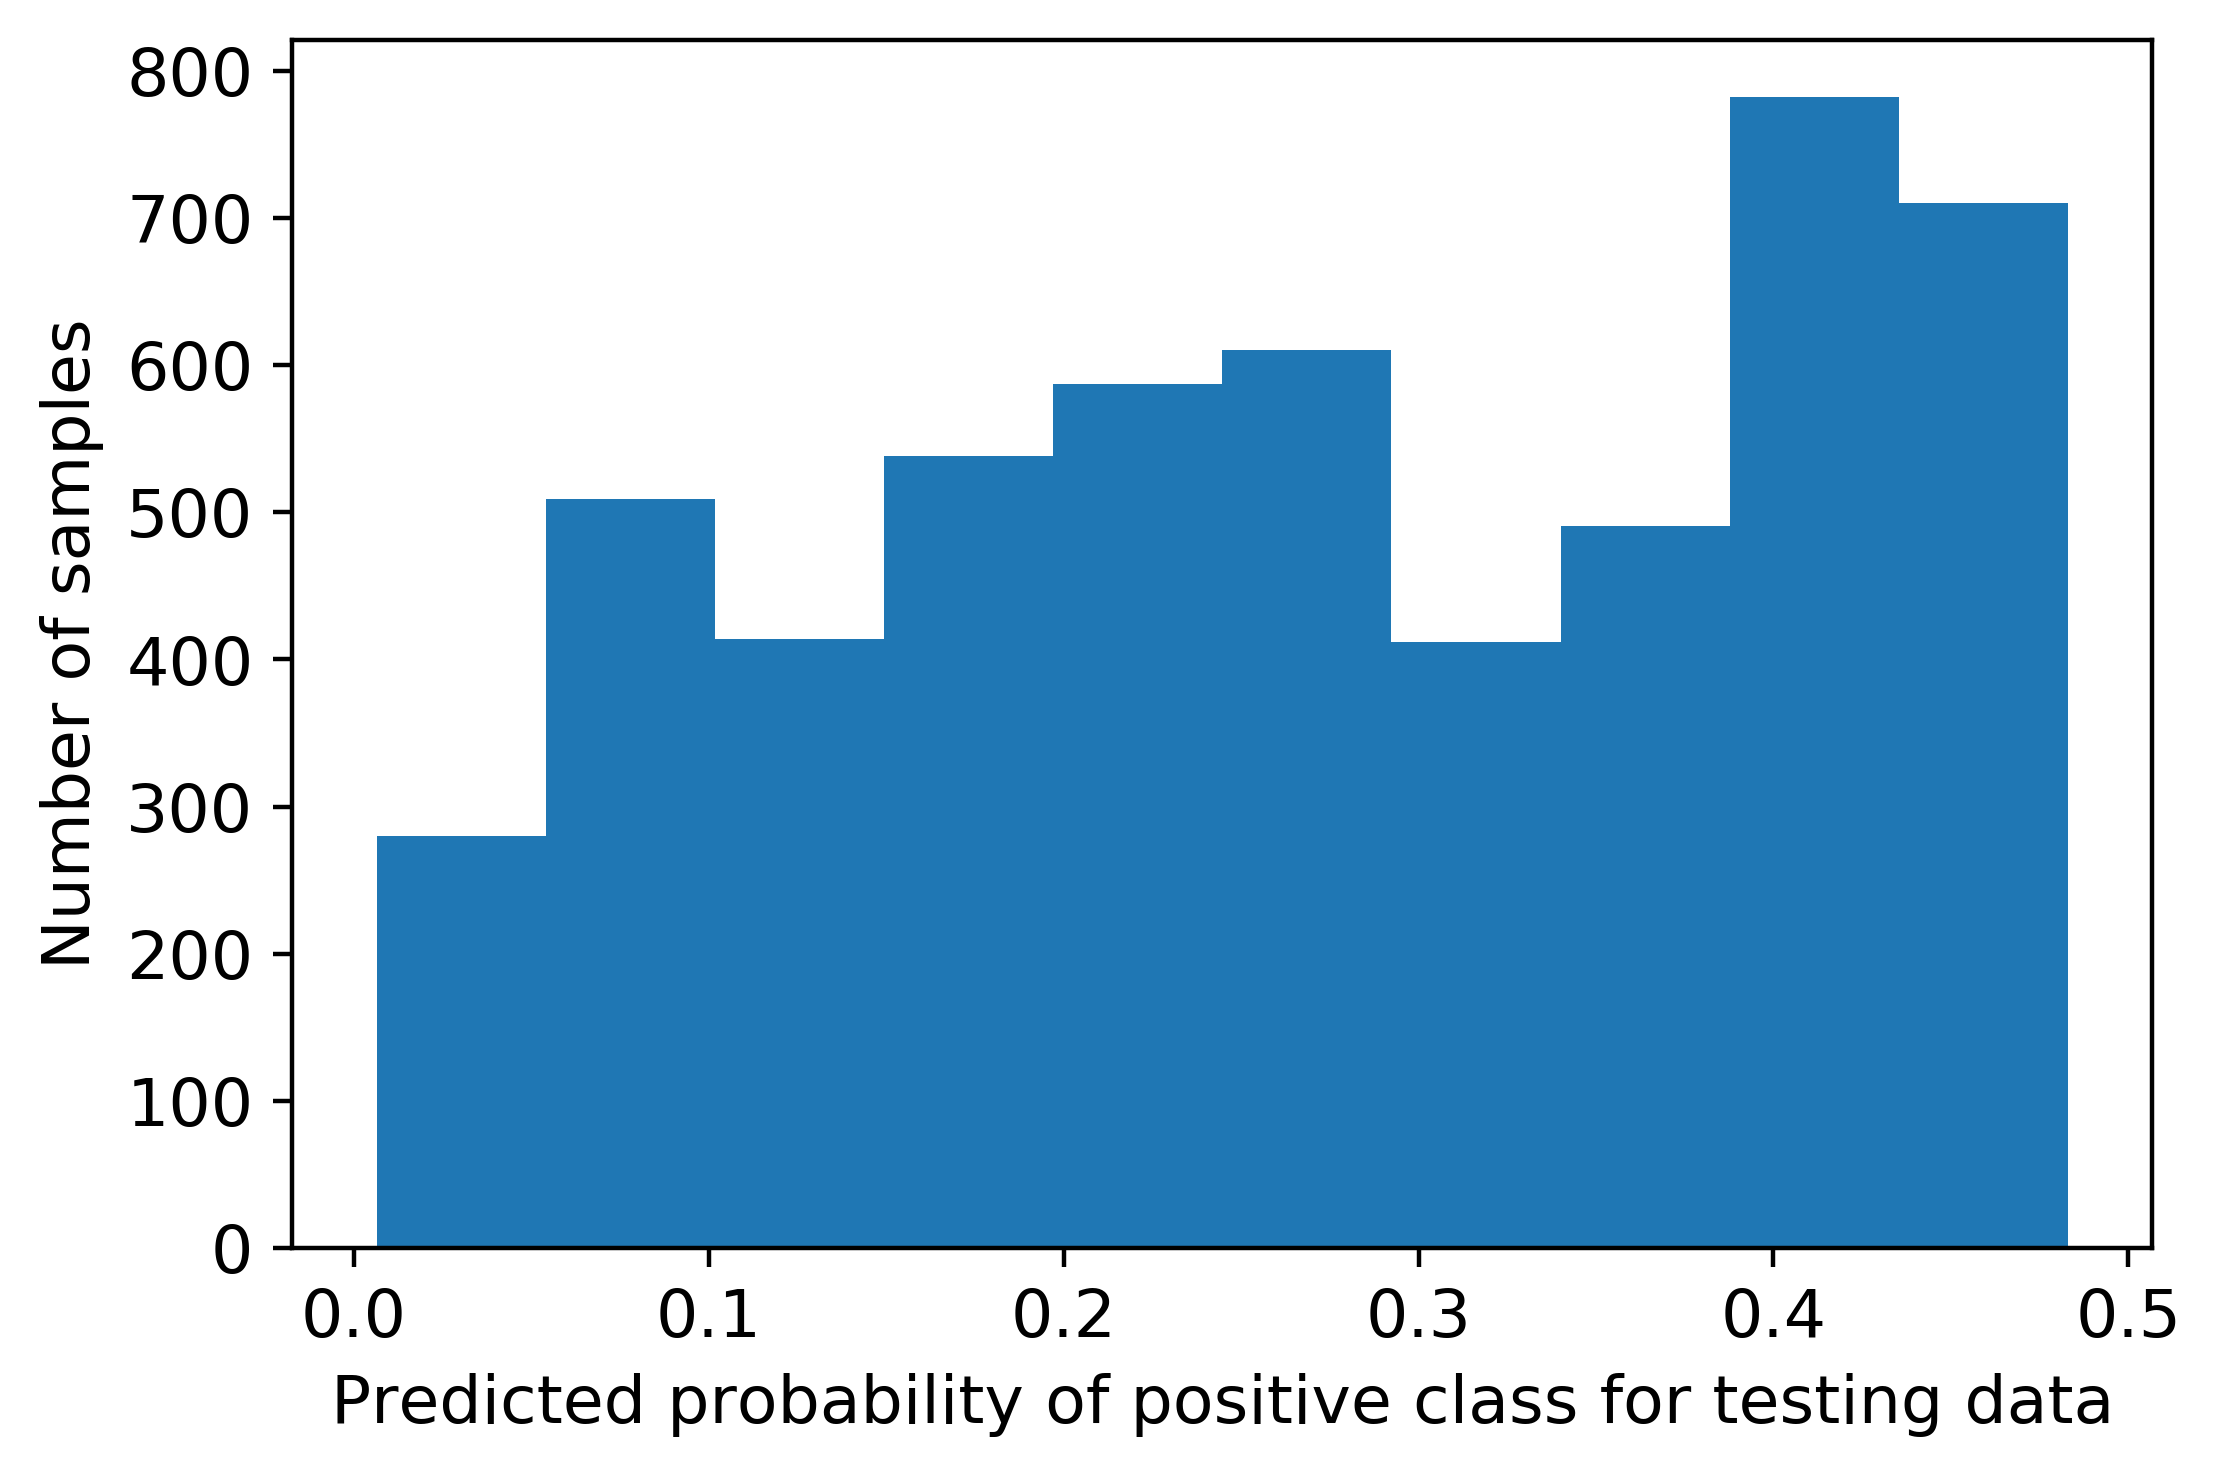

In [99]:
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [100]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

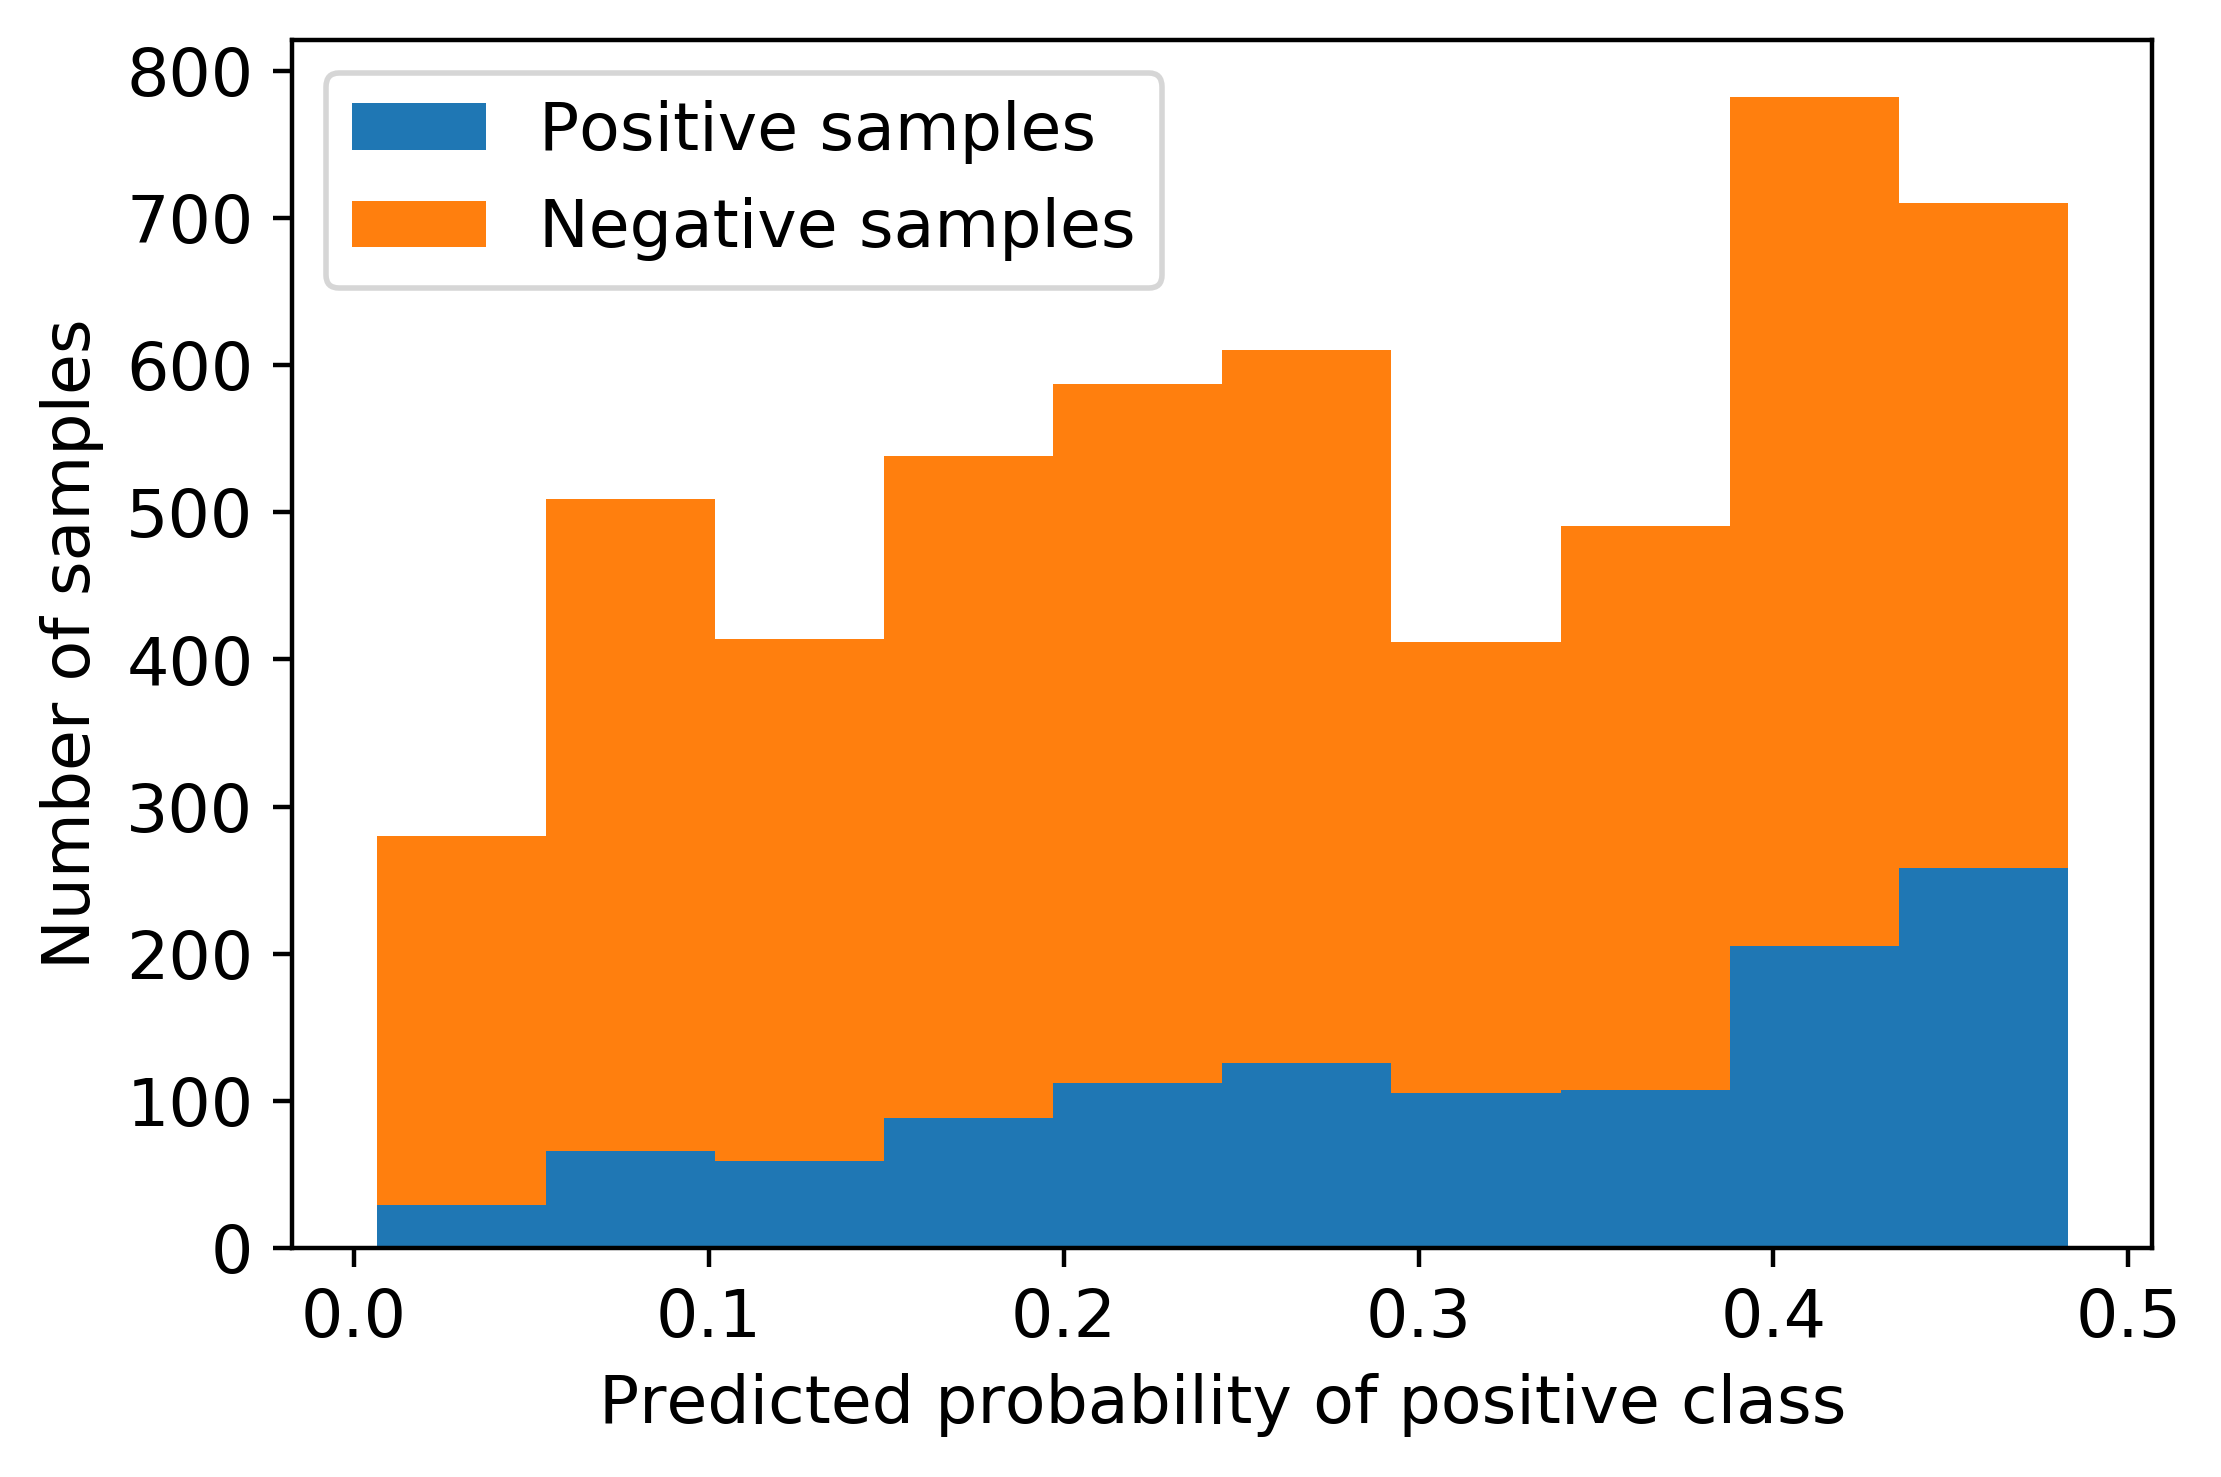

In [101]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [102]:
roc_auc_limit_bal = metrics.roc_auc_score(y_test, pos_proba)
roc_auc_limit_bal

0.6201990844642832

In [103]:
roc_auc_education = 0.5434650477972642

In [104]:
print("ROC AUC is greater for the 'LIMIT_BAL' feature but still not very effective as it is close to 0.5.")

ROC AUC is greater for the 'LIMIT_BAL' feature but still not very effective as it is close to 0.5.


_________________________________________________________________________
**Now, plot the ROC curve.**


In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
thresholds

array([1.48298465, 0.48298465, 0.46600867, 0.44911106, 0.4323301 ,
       0.415703  , 0.3992656 , 0.38305207, 0.3670946 , 0.35142324,
       0.33606566, 0.321047  , 0.30638978, 0.29211383, 0.27823623,
       0.26477132, 0.25173076, 0.23912359, 0.2269563 , 0.21523299,
       0.20395547, 0.19312344, 0.18273464, 0.17278502, 0.16326891,
       0.15417922, 0.14550758, 0.13724452, 0.12937966, 0.12190182,
       0.11479918, 0.10805946, 0.10166997, 0.09561779, 0.08988983,
       0.08447295, 0.07935404, 0.07452008, 0.0699582 , 0.06565578,
       0.06160044, 0.05778008, 0.05418298, 0.05079775, 0.04761337,
       0.04461922, 0.0418051 , 0.03916119, 0.03667808, 0.0343468 ,
       0.03215875, 0.03010574, 0.02817998, 0.02637405, 0.02468092,
       0.0230939 , 0.02021324, 0.01890793, 0.01654057, 0.01546869,
       0.01446524, 0.01033455, 0.00844134, 0.0078901 , 0.00644178])

Text(0.5, 1.0, 'ROC Curve')

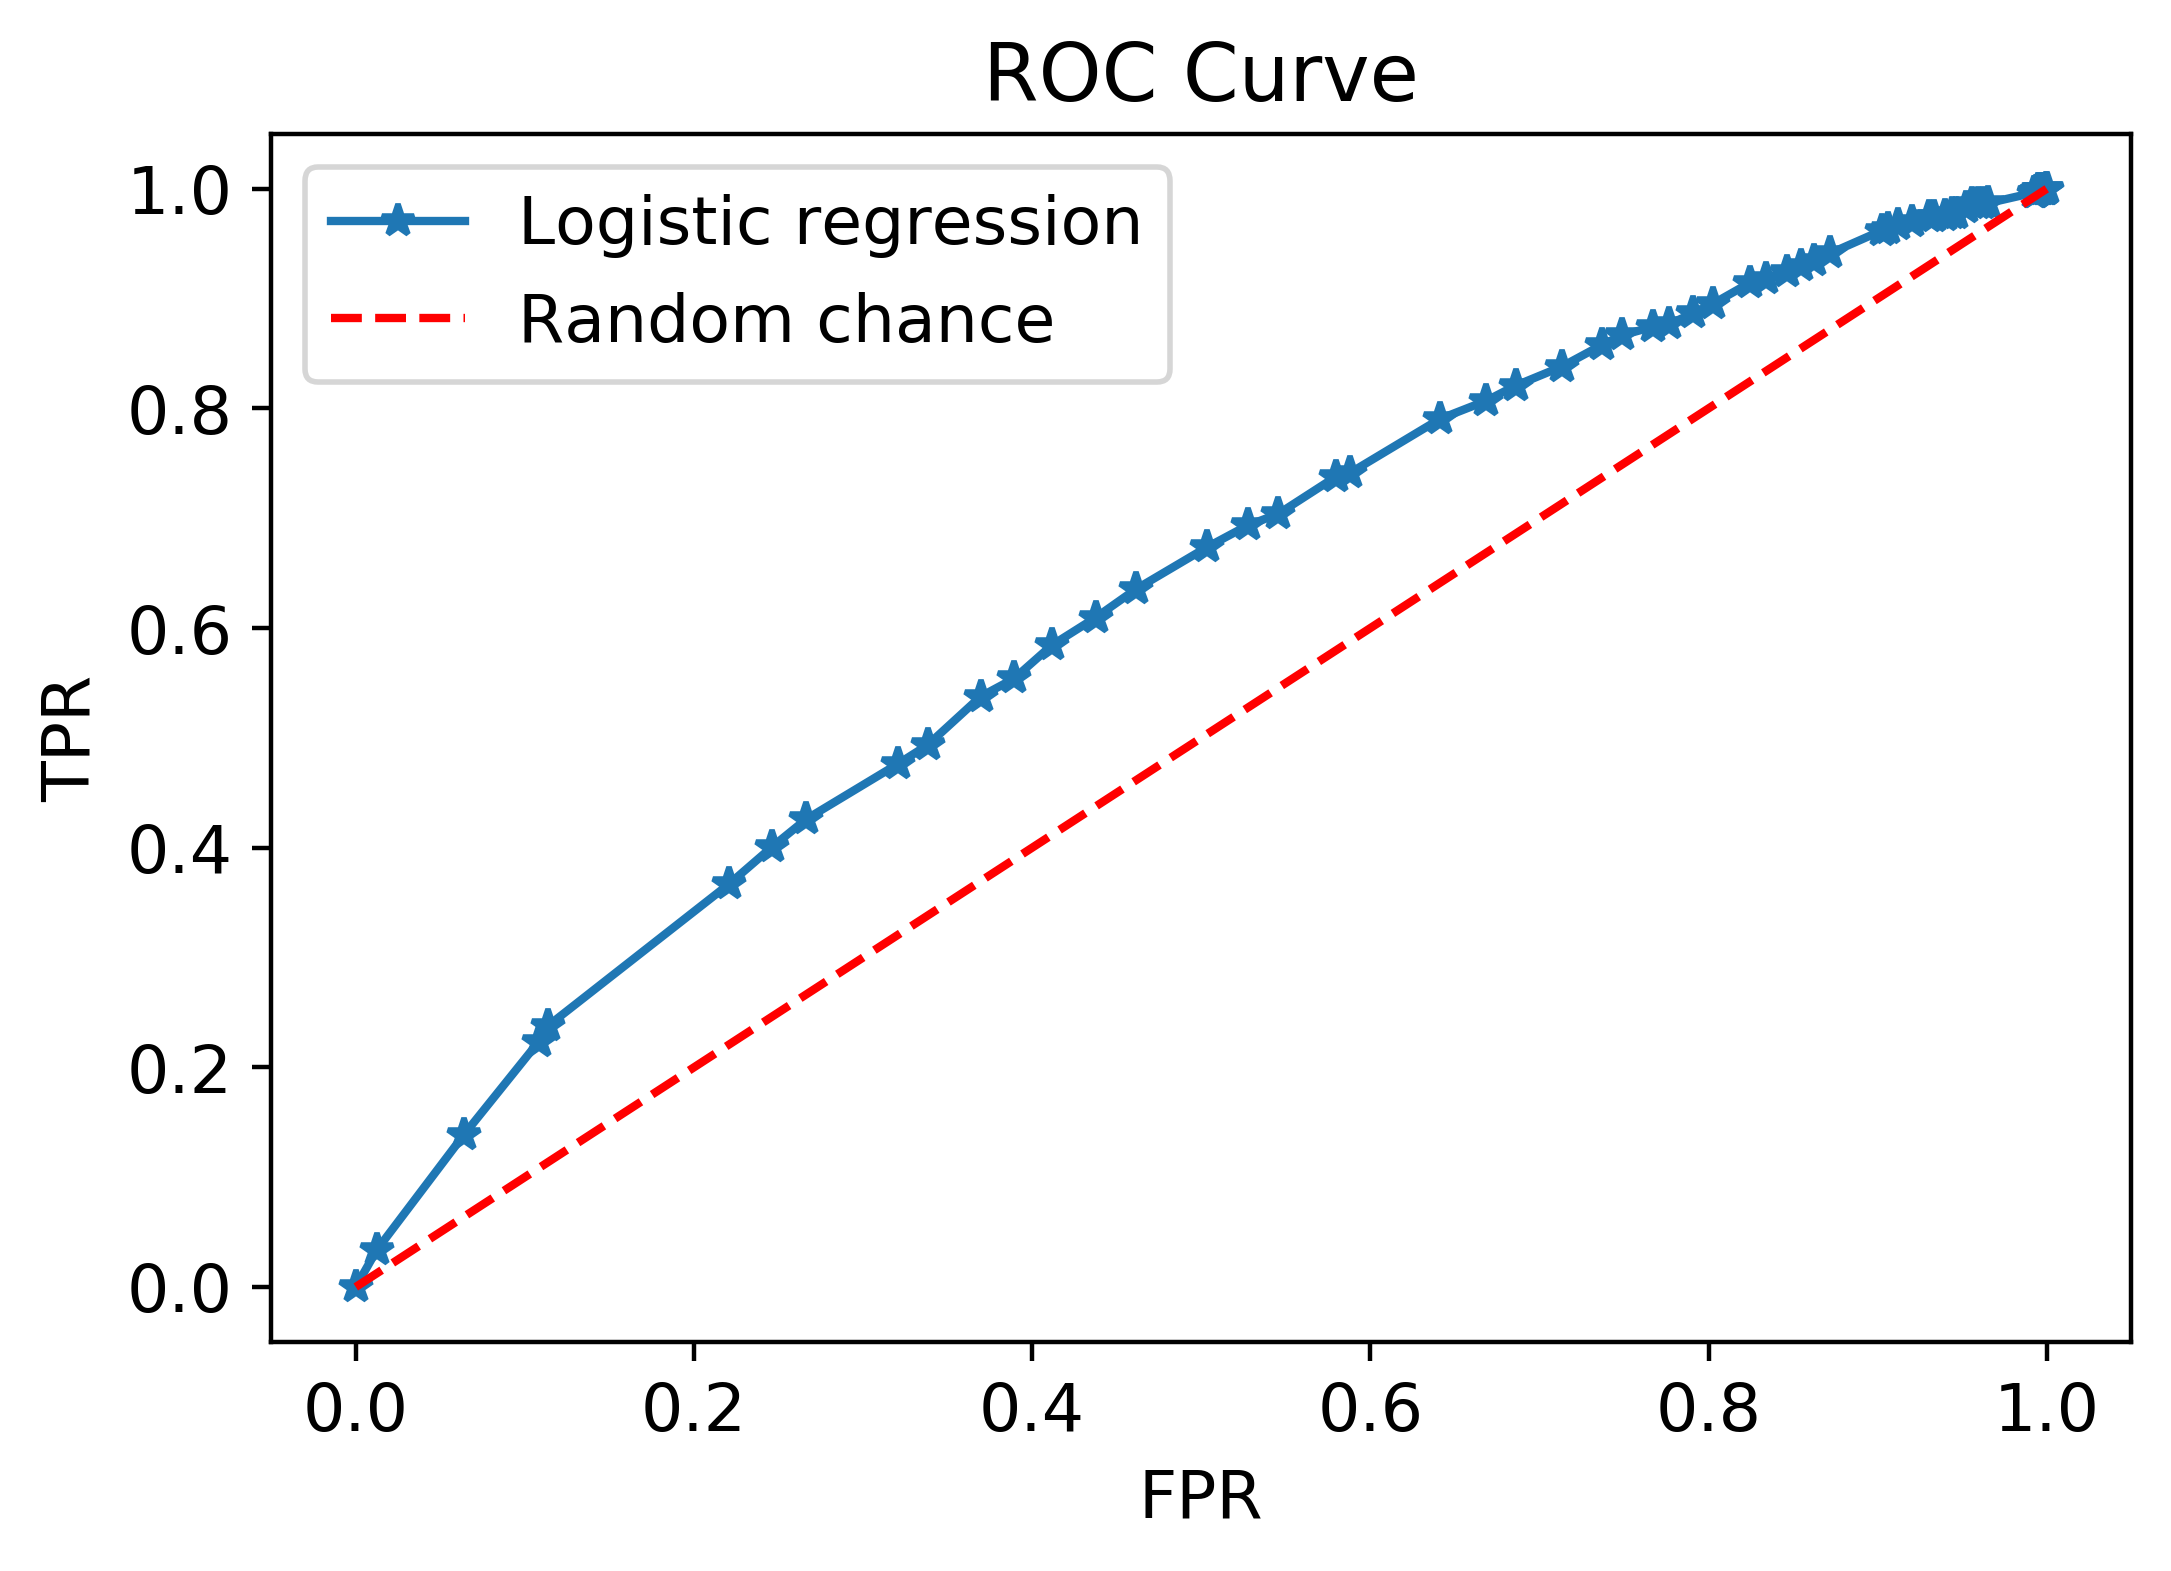

In [106]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [107]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision Recall Curve')

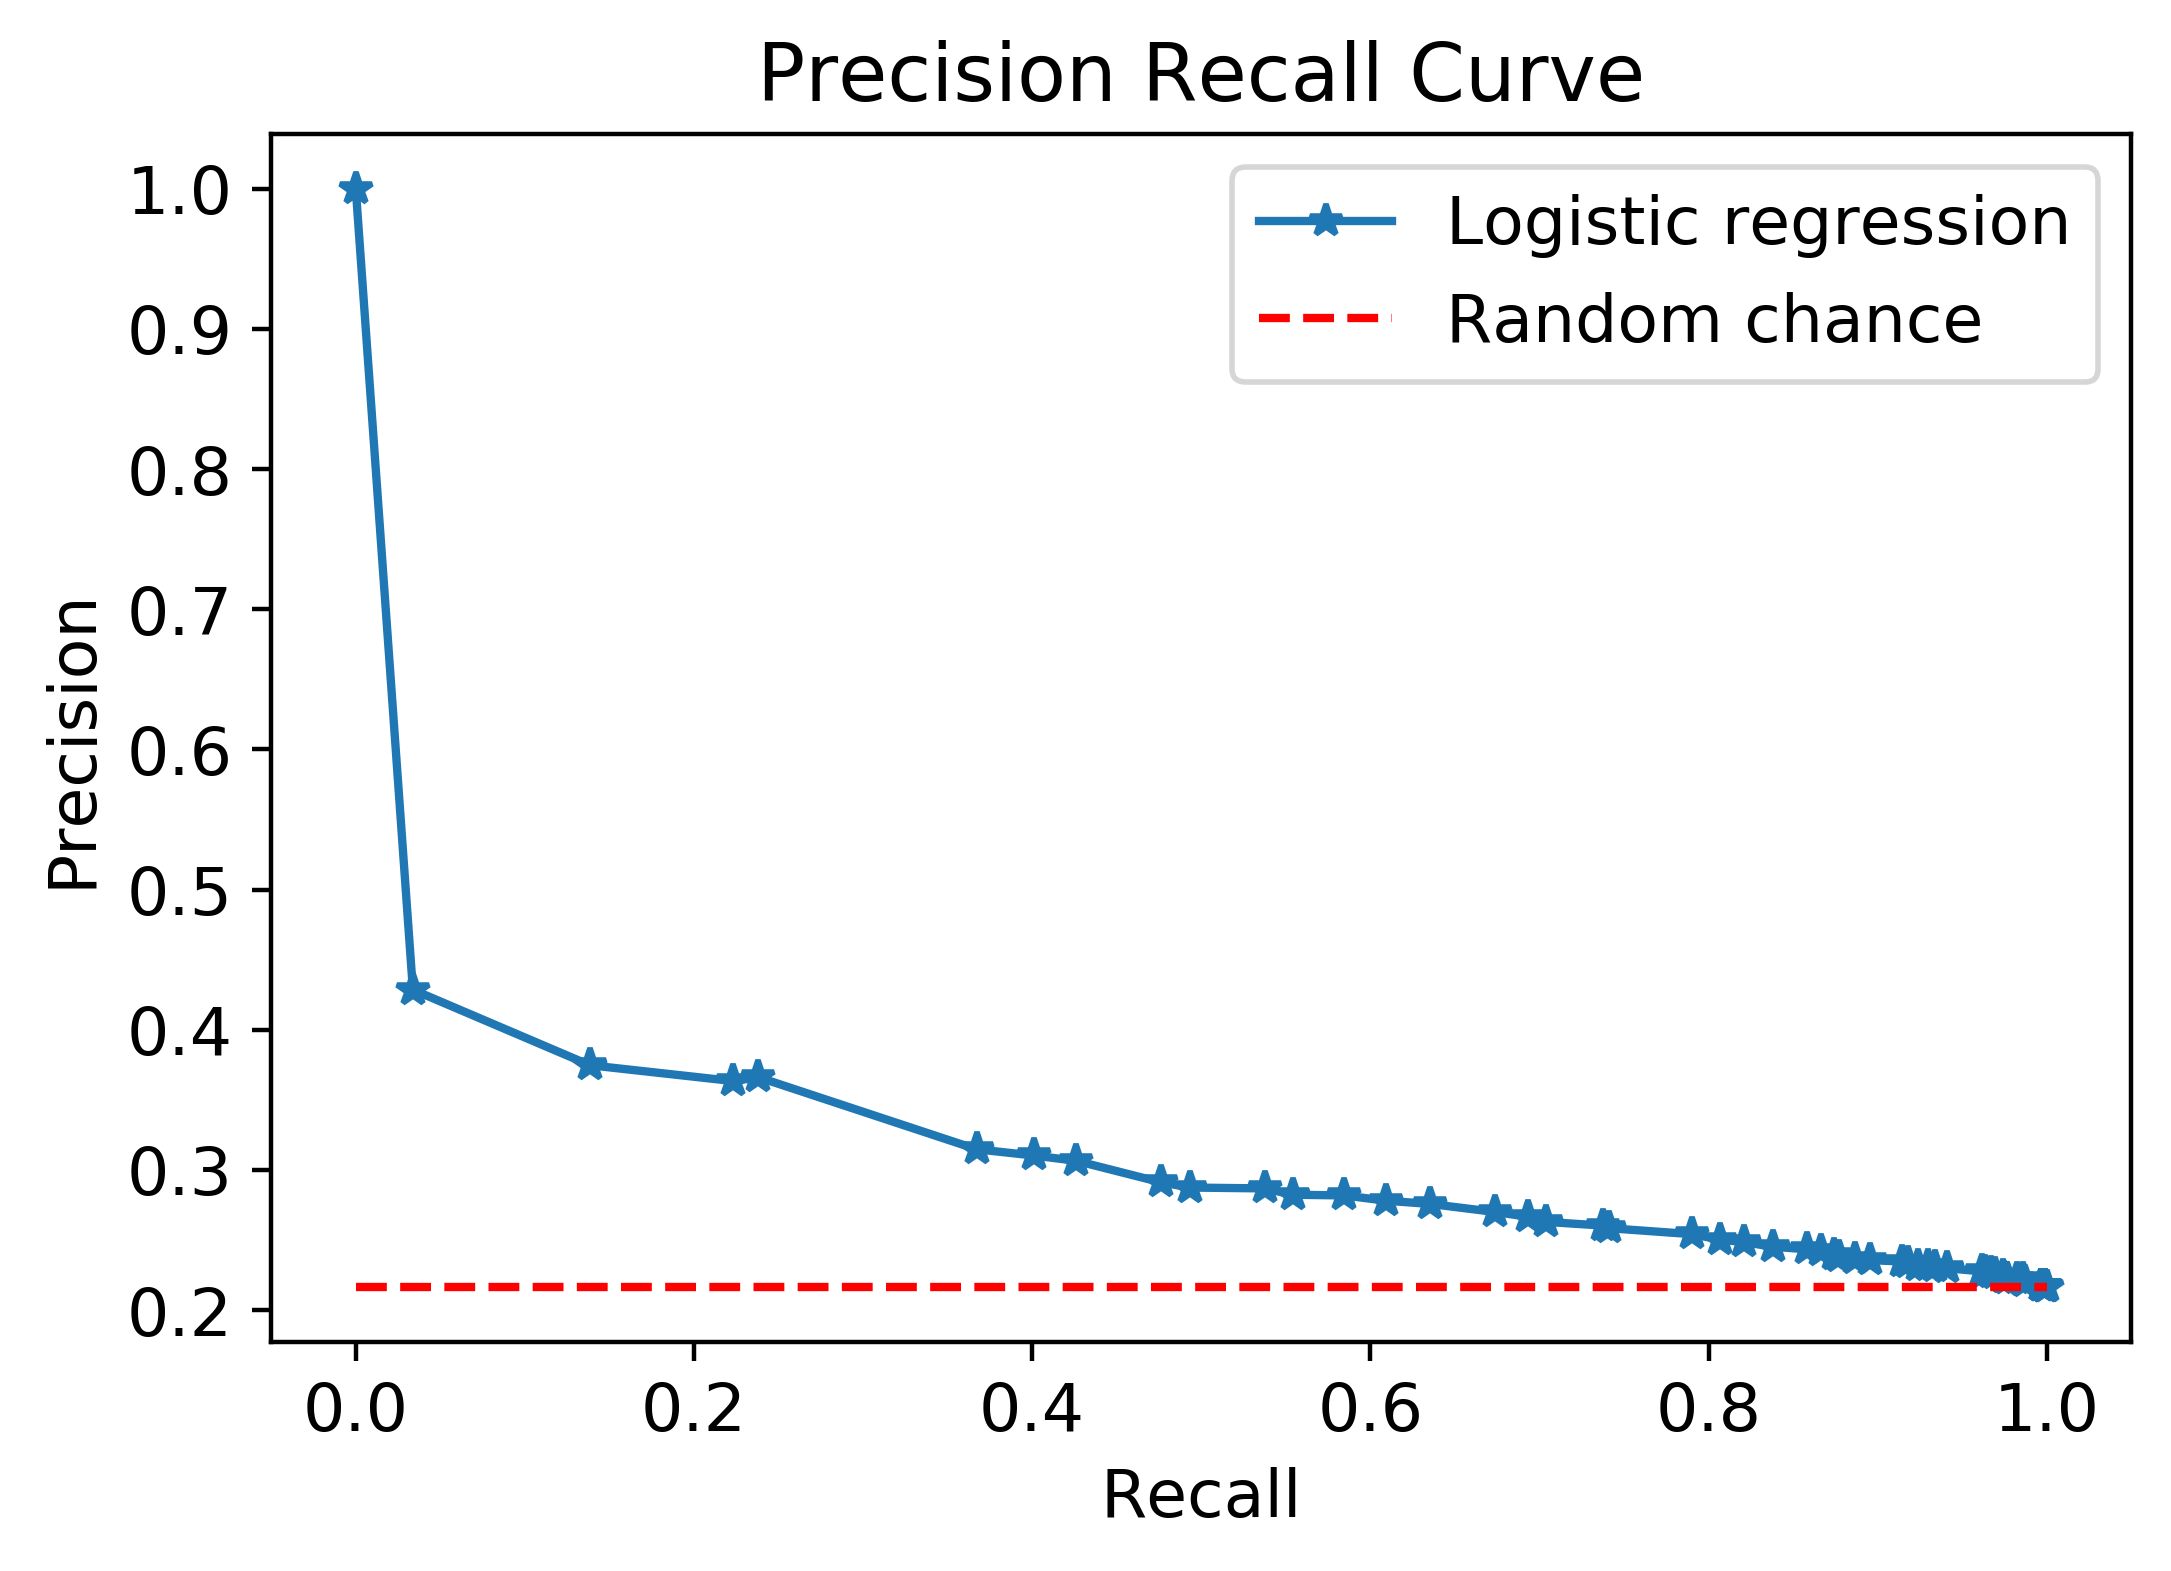

In [108]:
rand_chance = sum(y_test==1)/len(y_test)
plt.plot(recall, precision, '*-')
plt.plot([0, 1], [rand_chance,rand_chance], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [109]:
from sklearn.metrics import auc
precision_recall_auc = auc(recall, precision)
precision_recall_auc

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [110]:
X_train_predict_pos_proba = my_lr.predict_proba(X_train)[:,1]

In [111]:
roc_auc_limit_bal = metrics.roc_auc_score(y_train,X_train_predict_pos_proba)
roc_auc_limit_bal

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


In [112]:
remarks = '''In terms of quantity, the ROC AUC for
testing data and training data are nearly same;
but conceptually the ROC AUC for training data is different
as it is predicting the values it was trained on,
so for it the ROC AUC should have been higher.
But this is not the case here meaning the model to be not very effective.'''

In [113]:
print(remarks)

In terms of quantity, the ROC AUC for
testing data and training data are nearly same;
but conceptually the ROC AUC for training data is different
as it is predicting the values it was trained on,
so for it the ROC AUC should have been higher.
But this is not the case here meaning the model to be not very effective.
